In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.2.0'

In [3]:
from model_experiments.vae_experiment import VaeExperiment
from general.experiment import GenerativeModelType, TransformerType, OptimizerType
from general.utils import OutputActivation
from evaluators.machine_learning_evaluator import MachineLearningEvaluator, EvaluatorModelType, MetricType, ScalerType
from models.utils import Activation

import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from copy import deepcopy
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
import warnings
warnings.filterwarnings('ignore')

In [4]:
config = {
    "dataset": "adult.csv",
    "model_type": GenerativeModelType.VAE,
    "name": "vae_experiment",
    "data_path": "./data/",
    "data_processing": {
        "categorical_columns": [
            "workclass",
            "education",
            "marital-status",
            "occupation",
            "relationship",
            "race",
            "native-country",
            "sex",
            "output",
        ],
    },
    "model_config": {
        "compress_dims": [128, 128],
        "decompress_dims": [128, 128],
        "compress_activations": [Activation.LeakyReLU, Activation.LeakyReLU],
        "decompress_activations": [Activation.LeakyReLU, Activation.LeakyReLU],
        "latent_dim": 128,
        "batch_norm": True,
        "output_activations": {
            "continuous": OutputActivation.TANH,
            "categorical": OutputActivation.SOFTMAX,
        },
    },
    "model_train": {
        "seed": 1,
        "test_pct": 0.3,
        "k_fold": False,
        "stratified_by_col": None,
        "epochs": 50,
        "batch_size": 64,
        "dp_optimizer_type": OptimizerType.DPAdamGaussianOptimizer,
        "record_gradients": {"enabled": False, "subset": ["race", "sex"],},
        "transformer": {
            "type": TransformerType.BGM,
            "kwargs": {"outlier_clipping": True, "n_clusters": 6, "cont_feature_range": (-1, 1)},
        },
        "early_stop": {"enabled": False},
        "early_stop_epsilon": {"enabled": True, "value": 2.5},
    },
    "diff_priv": {
        "enabled": True,
        "microbatches": 1,
        "l2_norm_clip": 5.0,
        "noise_multiplier": 0.8,
    },
}

In [5]:
vae_experiment = VaeExperiment(config)
vae_experiment.run()

Training single model
Model number: 0
Max Epsilon of 2.5 reached at Epoch: 15, Step: 291
Start of epoch 0
Instructions for updating:
Use tf.identity instead.
step 0: mean loss = 32.57
step 100: mean loss = 31.86
step 200: mean loss = 31.13
step 300: mean loss = 30.88
epsilon = 1.70
Start of epoch 1
step 0: mean loss = 30.05
step 100: mean loss = 29.50
step 200: mean loss = 28.73
step 300: mean loss = 28.28
epsilon = 1.79
Start of epoch 2
step 0: mean loss = 27.29
step 100: mean loss = 27.03
step 200: mean loss = 26.23
step 300: mean loss = 26.56
epsilon = 1.86
Start of epoch 3
step 0: mean loss = 25.67
step 100: mean loss = 25.17
step 200: mean loss = 25.00
step 300: mean loss = 24.81
epsilon = 1.92
Start of epoch 4
step 0: mean loss = 24.10
step 100: mean loss = 23.82
step 200: mean loss = 23.38
step 300: mean loss = 23.62
epsilon = 1.98
Start of epoch 5
step 0: mean loss = 22.84
step 100: mean loss = 23.10
step 200: mean loss = 22.17
step 300: mean loss = 22.68
epsilon = 2.03
Start o

epsilon = 2.50
experiment saved to b13d1b3046e6d2537fc5f8eec096c93251accc2f.pkl


In [9]:
eval_input = {
    'target_col': 'output',
    'data_path': './data/',
    'config_file': 'b13d1b3046e6d2537fc5f8eec096c93251accc2f.pkl'
}

evaluator = MachineLearningEvaluator(**eval_input)

In [10]:
df = pd.read_csv('./data/adult.csv')

In [12]:
fake_df = evaluator.fake_df(model_run=0)

In [13]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,Fal
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,Fal
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,Fal
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,Fal
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,Fal


In [14]:
fake_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
0,34,Private,147034,HS-grad,10,Married-civ-spouse,Adm-clerical,Husband,White,Female,-320,4,40,United-States,Fal
1,28,Private,203126,Some-college,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,-102,-10,40,United-States,Fal
2,52,Private,187770,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Female,-276,-10,40,United-States,Fal
3,57,Private,134516,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,-356,-8,46,United-States,Fal
4,39,Private,141329,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,523,-12,36,United-States,Fal


In [15]:
fake_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,22792.000000,2.279200e+04,22792.000000,22792.000000,22792.000000,22792.00000
mean,36.380792,1.668786e+05,9.870656,-81.170498,0.798482,40.14198
std,12.875058,8.770922e+04,1.613079,1137.566724,34.290274,6.36153
min,13.000000,-6.053000e+03,3.000000,-416.000000,-18.000000,-1.00000
25%,27.000000,1.095960e+05,9.000000,-287.000000,-8.000000,40.00000
50%,34.000000,1.683630e+05,10.000000,-169.000000,-1.000000,40.00000
75%,42.000000,2.178948e+05,10.000000,23.000000,7.000000,40.00000
max,99.000000,1.080733e+06,16.000000,107160.000000,3300.000000,90.00000


In [16]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


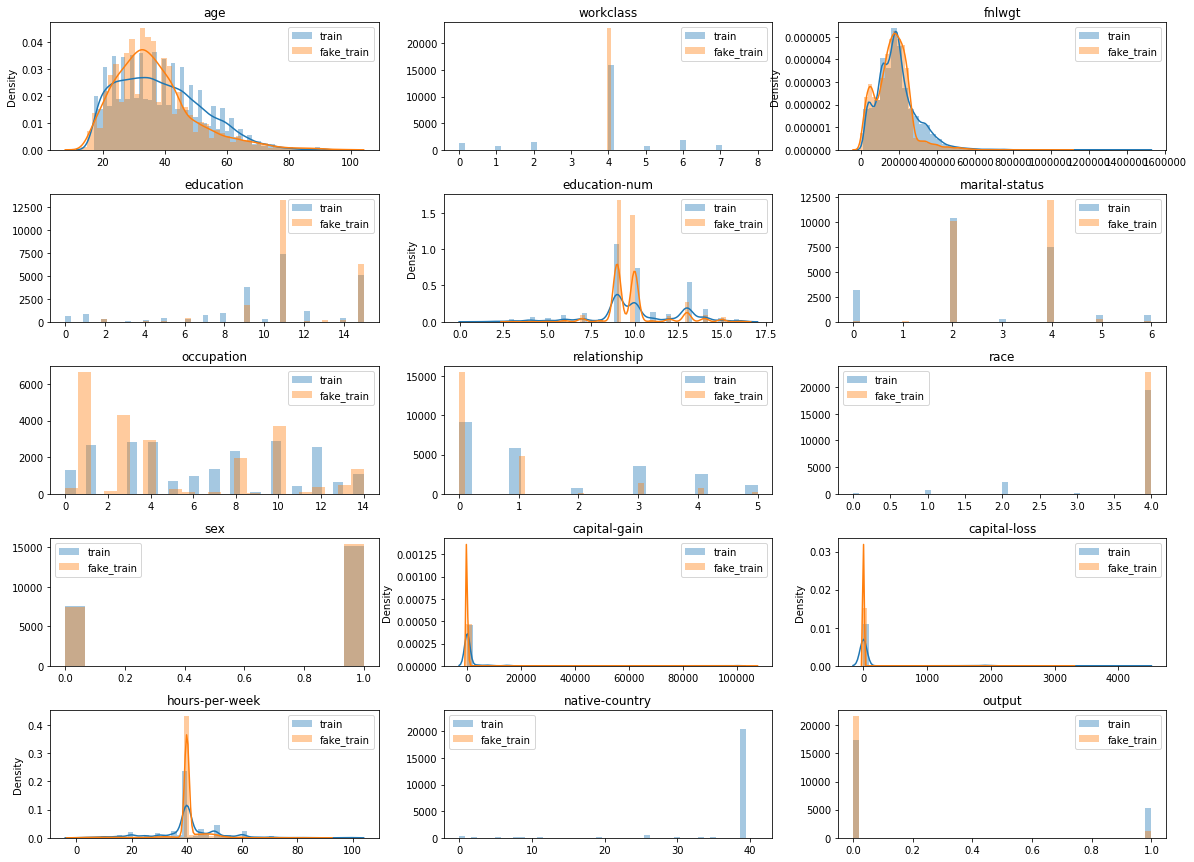

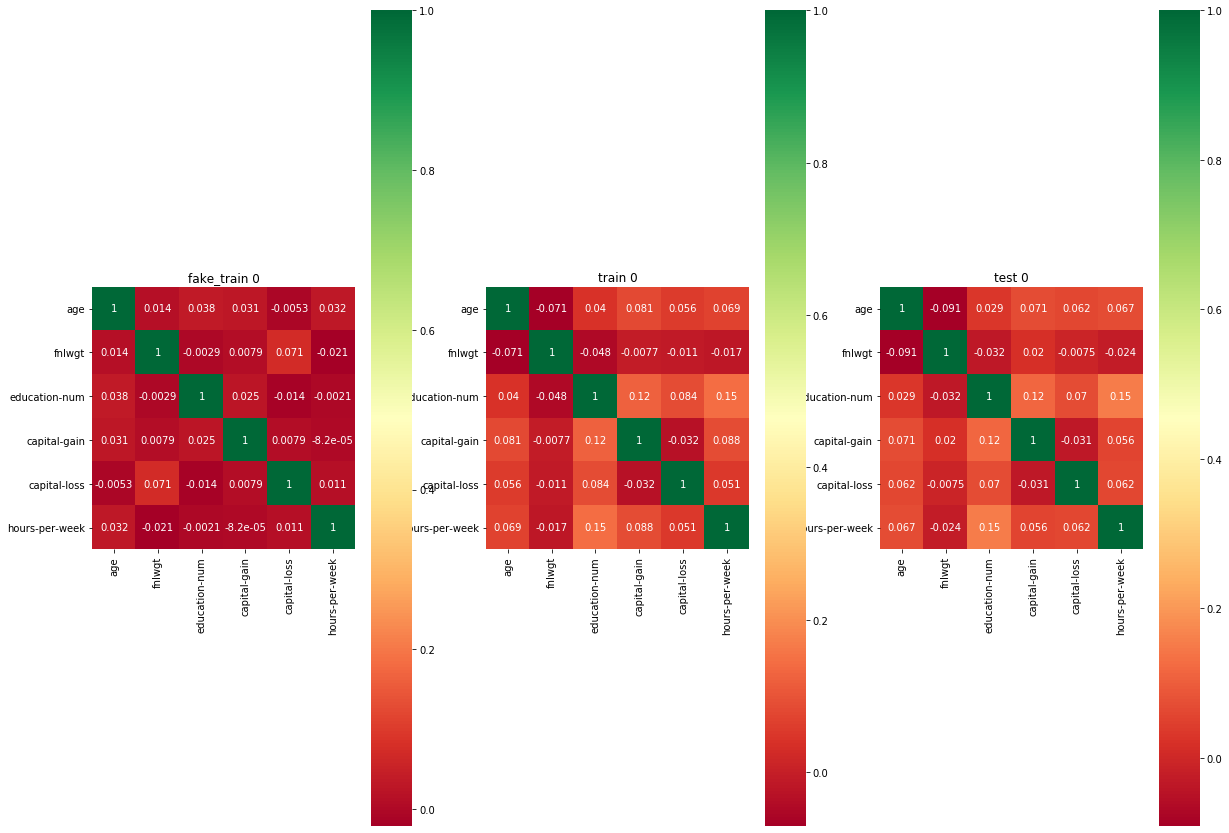

In [17]:
evaluator.plot_distributions()
evaluator.plot_heatmap()

In [20]:
model_kwargs = {'n_estimators': 50, 'max_depth': 5}
  
scores = evaluator.data_utility_scores(
   EvaluatorModelType.GradientBoostingClassifier, 
   [MetricType.ACCURACY],
   ScalerType.MINMAX,
   model_kwargs=model_kwargs)
print(scores)

   fake_test_accuracy  real_test_accuracy
0            0.752278            0.863753


In [19]:
fake_df.to_csv('./data/dp_adult.csv',index=False)